## Indexing in NumPy

### np.where vs masking

   * np.where returns just the indices where the equivalent mask is true
   * this is useful if you need the actual indices (maybe for counts)
   * otherwise the shorthand notation (masking) is perhaps easier
   * np.where returns a tuple

### Why do I care?

You may need to work directly in NumPy due to the size of your data.  NumPy has a number of tricks that can speed up your code.  Even if you already knew the **trick** shown here you may like to see some code that can help you compare the speeds of different methods...  This is important aspect of performance tuning or more specifically code optimization.


In [3]:
import numpy as np
%matplotlib inline
x = np.arange(5)
print(np.where(x < 3))
print(x < 3) 

(array([0, 1, 2]),)
[ True  True  True False False]


### Chaining logic statements

In [2]:
x = np.arange(10)

y1 = np.intersect1d(np.where(x > 3),np.where(x<7))
y2 = np.where((x > 3) & (x < 7))
y3 = np.where(np.logical_and(x > 3, x < 7))
y4 = x[(x > 3) & (x < 7)]
print(y1,y2,y3,y4)

[4 5 6] (array([4, 5, 6]),) (array([4, 5, 6]),) [4 5 6]


### Random helpful things in NumPy

In [3]:
a = np.array(['a','b','c','c'])
#a = np.sort(np.unique(a))
b = np.array(['c','d','e','c','f'])

mask1a = np.in1d(a,b)
mask1b = [np.where(b==i)[0].tolist() for i in a]
mask2a = np.in1d(b,a)
mask2b = [np.where(a==i)[0].tolist() for i in b]
print("1")
print(mask1a)
print(mask1b)
print("2")
print(mask2a)
print(mask2b)

1
[False False  True  True]
[[], [], [0, 3], [0, 3]]
2
[ True False False  True False]
[[2, 3], [], [], [2, 3], []]


### How does one array compare to another?

This example is also the real reason to read this notebook.

```python
a = np.array(['a','b','c'])
b = np.array(['c','d','e','c','f'])
```
   * Where do we find elements of a in b?
   * Where do we find elements of b in a?
   * If you can use np.in1d
   
[np.in1d](http://docs.scipy.org/doc/numpy/reference/generated/numpy.in1d.html) is fast. But alway make sure you understand **when** it can be used before using it.

   * if we have a query(a) and a search(b) list it can be helpful if you sort and make unique the query list
   * it also helps to only look for things you can find

You might be suprised how often this comes up.

   * matrix of hospital visits give me only data on subjects from $a$
   * matrix of test scores use only subjects where name is in list $a$ 


In [ ]:
## Get rid of nans
x = np.array([[1., 2., np.nan, 3., np.nan, np.nan]])
x[~np.isnan(x)]

## carry around indices
labels = np.array(['x' + str(i)for i in range(10)])
x = np.random.randint(1,14,10)
sortedInds = np.argsort(x)
print("sorted labels: %s"%labels[sortedInds])

## make x have exactly 5 evenly spaced points in the range 11 to 23
np.linspace(11,23,5)

## numpy has very efficient set operations
print(np.intersect1d(np.array([1,2,3]),np.arange(10)))


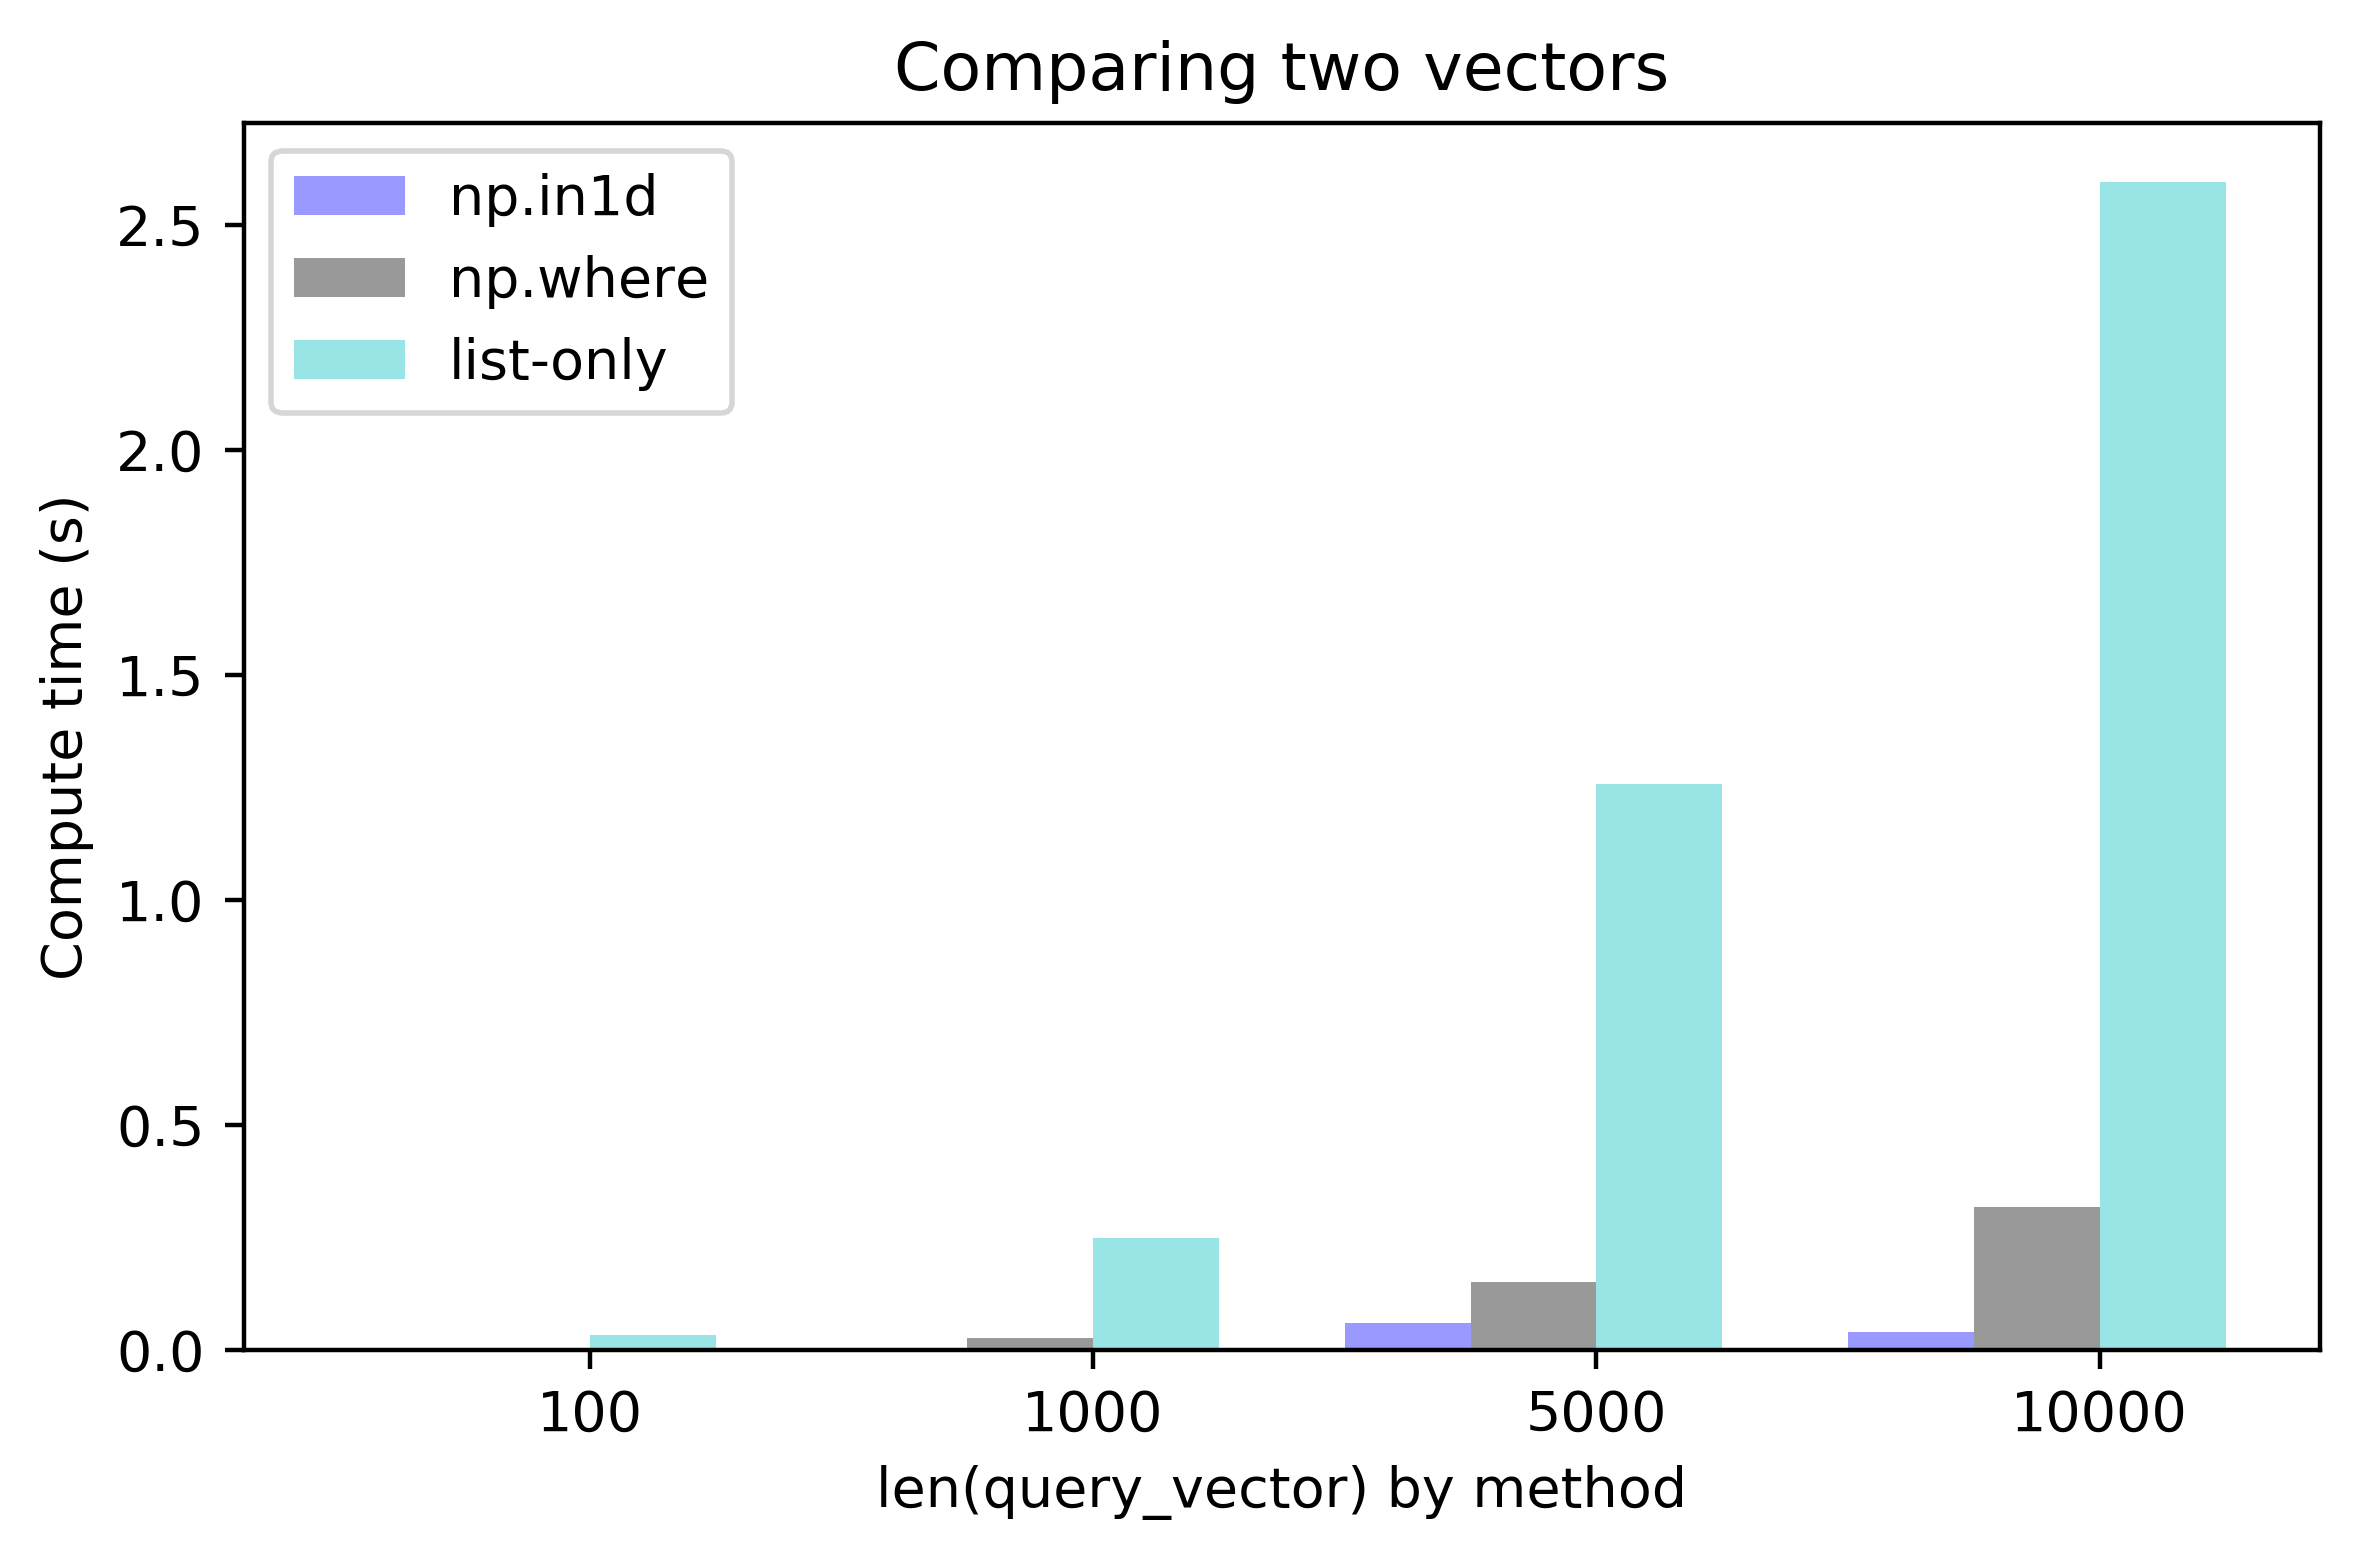

In [4]:
import matplotlib.pyplot as plt
import time

sizes = [100,1000,5000,10000]

times1,times2,times3 = [],[],[]

for n1 in sizes:
    n2 = n1 * 100
    a = np.random.randint(0,200,n1)
    b = np.random.randint(0,100,n2)
    b_list = b.tolist()
    
    ## attempt 1
    time_start = time.time()
    a = np.sort(np.unique(a))
    a = a[np.in1d(a,b)]
    times1.append(time.time()-time_start)

    ## attempt 2
    time_start = time.time()
    inds2 = [np.where(b==i)[0] for i in a]
    inds2 = [item for sublist in inds2 for item in sublist]
    inds2 = np.sort(np.array(inds2))
    times2.append(time.time()-time_start)
    
    ## attempt 3
    time_start = time.time()
    inds3 = np.array([i for i,x in enumerate(b_list) if x in a])
    inds3.sort()
    times3.append(time.time()-time_start)
    
times1,times2,times3 = [np.array(t) for t in [times1,times2,times3]]        

fig = plt.figure(figsize=(6,4),dpi=400)
ax = fig.add_subplot(111)

index = np.arange(len(sizes))
bar_width = 0.25
opacity = 0.4

rects1 = plt.bar(index, times1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='np.in1d')

rects1 = plt.bar(index + bar_width, times2, bar_width,
                 alpha=opacity,
                 color='k',
                 label='np.where')

rects2 = plt.bar(index + (bar_width * 2.0), times3, bar_width,
                 alpha=opacity,
                 color='c',
                 label='list-only')

plt.xlabel('len(query_vector) by method')
plt.ylabel('Compute time (s)')
plt.title('Comparing two vectors')
plt.xticks(index + bar_width + (bar_width/2.0), [str(s) for s in sizes] )
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

    
    